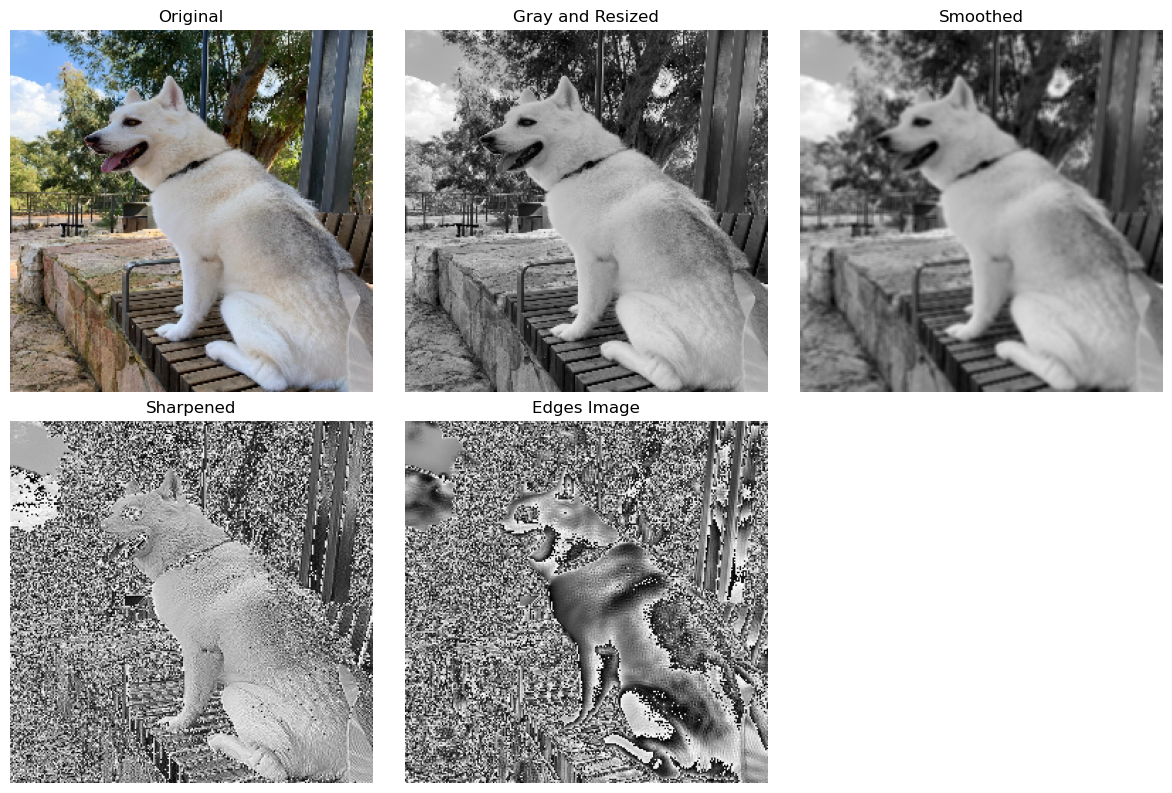

In [1]:
#Part 1


import cv2
import numpy as np
import matplotlib.pyplot as plt

def pad_image(image, pad_size, pad_type=''):
    if pad_type == 'constant':
        return np.pad(image, pad_size, mode='constant', constant_values=0)
    elif pad_type == 'reflect':
        return np.pad(image, pad_size, mode='reflect')
    elif pad_type == 'wrap':
        return np.pad(image, pad_size, mode='wrap')
    elif pad_type == 'edge':
        return np.pad(image, pad_size, mode='edge')
    elif pad_type == 'zero':
        return np.pad(image, pad_size, mode='constant', constant_values=0)
    else:
        raise ValueError("Invalid padding type. Choose 'constant', 'reflect', 'wrap', 'edge', or 'zero'.")

def my_imfilter(image, filter_kernel, pad_type=''):
    pad_size = (filter_kernel.shape[0] // 2, filter_kernel.shape[1] // 2)
    padded_image = pad_image(image, pad_size, pad_type)
    rows, cols = image.shape
    k_rows, k_cols = filter_kernel.shape
    filtered_image = np.zeros_like(image)
    for r in range(rows):
        for c in range(cols):
            roi = padded_image[r:r + k_rows, c:c + k_cols]
            filtered_image[r, c] = np.sum(roi * filter_kernel)
    return filtered_image

def smooth_image(image, pad_type='reflect'):
    smooth_kernel = np.ones((3, 3)) / 9.8
    return my_imfilter(image, smooth_kernel, pad_type)

def edge_detection(image, pad_type='reflect'):
    edge_kernel = np.array([[-1, -1, -1],
                            [-1,  3, -1],
                            [-1, -1, -1]]) 
    return my_imfilter(image, edge_kernel, pad_type)

def sharpen_image(image, pad_type='reflect'):
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]]) 
    return my_imfilter(image, sharpen_kernel, pad_type)

# Load and preprocess the image
img = cv2.imread("C:/Users/dasha/Downloads/Silver.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray_img, (256, 256))
resized_img2 = cv2.resize(img, (256, 256))

# Apply image processing functions
smoothed_img = smooth_image(resized_img, pad_type='reflect')
sharpened_img = sharpen_image(resized_img, pad_type='reflect')
edges_img = edge_detection(resized_img, pad_type='reflect')

# Display images inline in Jupyter Notebook using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(resized_img2, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(resized_img, cmap='gray')
plt.title('Gray and Resized')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Smoothed')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(edges_img, cmap='gray')
plt.title('Edges Image')
plt.axis('off')

plt.tight_layout()
plt.show()

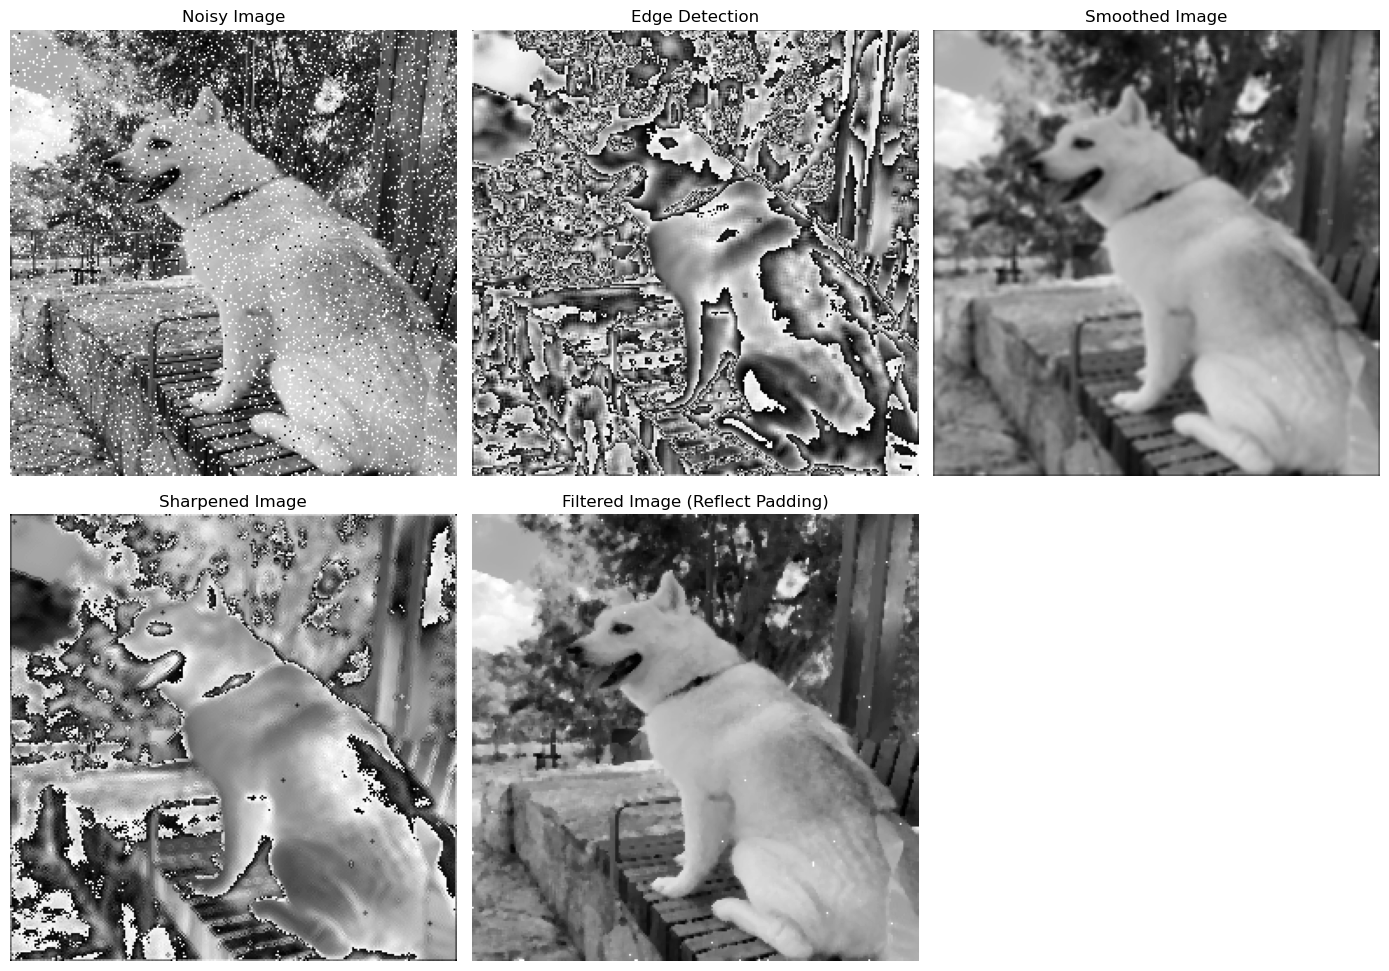

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pad_image(image, pad_size, pad_type):
    if pad_type == 'constant':
        return np.pad(image, pad_size, mode='constant', constant_values=0)
    elif pad_type == 'reflect':
        return np.pad(image, pad_size, mode='reflect')
    elif pad_type == 'edge':
        return np.pad(image, pad_size, mode='edge')
    else:
        raise ValueError("Invalid padding type. Choose 'constant', 'reflect', or 'edge'.")

# Function to apply non-linear filtering
def my_im_nl_filter(image, m, n, nlf, pad_type='constant'):
    pad_size = ((m//2, m//2), (n//2, n//2))
    padded_image = pad_image(image, pad_size, pad_type)
    rows, cols = image.shape
    filtered_image = np.zeros_like(image)
    
    for r in range(rows):
        for c in range(cols):
            roi = padded_image[r:r+m, c:c+n]
            filtered_image[r, c] = nlf(roi)
    
    return filtered_image

# Median filter function
def median_filter(roi):
    return np.median(roi)

# Function to add salt and pepper noise
def add_noise(image, salt_prob=0.09, pepper_prob=0.01):
    noisy_image = np.copy(image)
    salt_mask = np.random.rand(*image.shape) < salt_prob
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[salt_mask] = 255
    noisy_image[pepper_mask] = 0
    return noisy_image

# Function to smooth the image
def smooth_image(image):
    smooth_kernel = np.ones((3, 3)) / 12
    return my_im_nl_filter(image, 3, 3, lambda x: np.sum(x * smooth_kernel))

# Function to sharpen the image
def sharpen_image(image):
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 2, -1],
                               [0, -1, 0]])
    return my_im_nl_filter(image, 3, 3, lambda x: np.sum(x * sharpen_kernel))

# Function for edge detection
def edge_detection(image):
    edge_kernel = np.array([[-1, -1, -1],
                            [-1,  2, -1],
                            [-1, -1, -1]]) 
    return my_im_nl_filter(image, 3, 3, lambda x: np.sum(x * edge_kernel))

# Main script to process images
if __name__ == "__main__":
    # Load and preprocess the image
    img = cv2.imread("C:/Users/dasha/Downloads/Silver.jpg")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (256, 256))
    
    # Add salt and pepper noise
    noisy_img = add_noise(resized_img)
    
    # Apply median filtering with different padding types
    filtered_images = {}
    padding_types = ['constant', 'reflect', 'edge']
    
    for pad_type in padding_types:
        filtered_img = my_im_nl_filter(noisy_img, 3, 3, median_filter, pad_type)
        filtered_images[pad_type] = filtered_img
    
    # Optionally sharpen the filtered image
    sharpened_img = sharpen_image(filtered_images['reflect'])
    smoothed_img = smooth_image(filtered_images['reflect'])
    edges_img = edge_detection(filtered_images['reflect'])
    
    # Displaying the images using Matplotlib
    plt.figure(figsize=(14, 10))
    
    plt.subplot(2, 3, 1)
    plt.imshow(noisy_img, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(edges_img, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Smoothed Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(sharpened_img, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(filtered_images['reflect'], cmap='gray')
    plt.title('Filtered Image (Reflect Padding)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
